<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-4">Introduction</a></span></li><li><span><a href="#General-information" data-toc-modified-id="General-information-5">General information</a></span><ul class="toc-item"><li><span><a href="#Company-data" data-toc-modified-id="Company-data-5.1">Company data</a></span></li><li><span><a href="#Dropoff-data" data-toc-modified-id="Dropoff-data-5.2">Dropoff data</a></span></li></ul></li><li><span><a href="#Exploratory-data-analysis" data-toc-modified-id="Exploratory-data-analysis-6">Exploratory data analysis</a></span><ul class="toc-item"><li><span><a href="#Top-10-dropoff-locations" data-toc-modified-id="Top-10-dropoff-locations-6.1">Top 10 dropoff locations</a></span></li><li><span><a href="#Top-10-companies" data-toc-modified-id="Top-10-companies-6.2">Top 10 companies</a></span></li></ul></li><li><span><a href="#Hypothesis-testing" data-toc-modified-id="Hypothesis-testing-7">Hypothesis testing</a></span></li><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-8">Conclusion</a></span></li></ul></div>

# Introduction

**Zuber** is just launching its cab services in Chicago. We want to analyze data of the services offered by other companies in order to find useful patterns that can help our company making the right strategies and taking the right decisions.

In the last part of our analysis, we'll take a look at how weather conditions affect trips from *Loop* to *O'Hare International Airport*.

# General information

In [1]:
# Importing custom libraries

import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt

## Company data

We'll start by analyzing the dataset that contains information about the other cab companies.

In [2]:
# Importing the data for each company
companies_data = pd.read_csv('/datasets/project_sql_result_01.csv')

# Taking a look at the dataset
companies_data.head()

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [3]:
# Getting the general information of the dataset
companies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


As we can see, there are no missing values and also the datatypes for each column are correct. We'll drop duplicate rows if any.

In [4]:
companies_data.drop_duplicates()
companies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


## Dropoff data

Now, we have a dataset that contains information about the locations where the companies offered their services. This will help us identify the most popular destinations users go to.

In [5]:
# Importing the data containing information about the dropoffs
dropoff_data = pd.read_csv('/datasets/project_sql_result_04.csv')

# Taking a look at the dataset
dropoff_data.head()

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [6]:
# Getting the general information of the dataset
dropoff_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Once again, everything seems alright with this dataset. However, we would like to round up the information for average trips, as it can be cleaner to work with whole numbers in the future. 

In [7]:
dropoff_data['average_trips'] = dropoff_data['average_trips'].apply(np.round).astype(int)

# Checking the results
dropoff_data.head()

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547


As before, we'll drop duplicated rows if any.

In [8]:
dropoff_data.drop_duplicates()
dropoff_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   dropoff_location_name  94 non-null     object
 1   average_trips          94 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.6+ KB


# Exploratory data analysis

## Top 10 dropoff locations

Now, we are set to analyze our datasets. We'll start by analyzing the top 10 dropoff locations by number of trips.

In [9]:
# sorting the dataset
top_dropoff_locations = dropoff_data.sort_values(by='average_trips', ascending=False).head(10)
top_dropoff_locations

,dropoff_location_name,average_trips
0,Loop,10727
1,River North,9524
2,Streeterville,6665
3,West Loop,5164
4,O'Hare,2547
5,Lake View,2421
6,Grant Park,2069
7,Museum Campus,1510
8,Gold Coast,1364
9,Sheffield & DePaul,1260


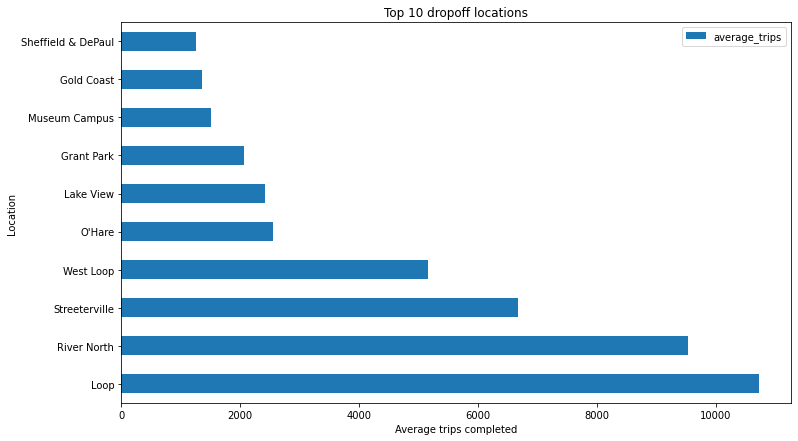

In [10]:
# Plotting the dataset
top_dropoff_locations.plot.barh(x='dropoff_location_name', figsize=(12,7))
plt.title('Top 10 dropoff locations')
plt.xlabel('Average trips completed')
plt.ylabel('Location')
plt.show()

As can be seen, cabs offer significantly more services to users in the *Loop, River North, Streetville* and *West Loop* neighborhoods than the rest. This information gives us a way of knowing where to offer services at **Zuber**.

Now, let us do the same for cab companies.

## Top 10 companies

In [11]:
# Getting the top 10 companies by trips made
top_companies = companies_data.sort_values(by='trips_amount', ascending=False).head(10)

# checking the results
top_companies

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


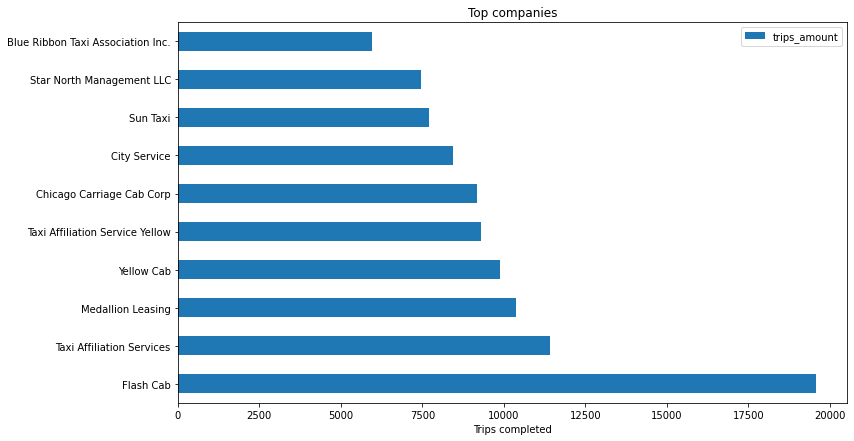

In [12]:
# Plotting the results
top_companies.plot.barh(x='company_name', figsize=(12,7))
plt.title('Top companies')
plt.xlabel('Trips completed')
plt.ylabel('')
plt.show()

*Flas Cab* is the indisputable leader by far. They must offer a very good service and must have many units working. In second place comes *Taxi Affiliation Services*, but does not differ from the other top by that much.

# Hypothesis testing

As explained in the Introduction, we want to know how weather conditions affect trips from *Loop* to *O'Hare International Airport*. In order to do so, we'll test the following hypothesis:

- The average trip duration from *Loop* to *O'Hare International Airport* changes on rainy Saturdays.

That is, we have

- **Null hypothesis**: The average trip duration from *Loop* to *O'Hare International Airport* does not change on rainy Saturdays.
- **Alternate hypothesis**: The average trip duration from *Loop* to *O'Hare International Airport* changes on rainy Saturdays.

For that end, we were given data containing information about trips from *Loop* to *O'Hare* along with the weather conditions and the duration of the trip.

In [13]:
# Importing the data
loop_ohare = pd.read_csv('/datasets/project_sql_result_07.csv')

# Taking a look at the dataset
loop_ohare.head()

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [14]:
# Getting general information of the dataset
loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


We'll change the "start_ts" column's datatype to datetime. Besides that, the dataframe looks OK.

In [15]:
# Changing datatype
loop_ohare['start_ts'] = pd.to_datetime(loop_ohare['start_ts'], format='%Y-%m-%d %H:%M:%S')

# Checking the results
loop_ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


Now, let us check the values for "weather_conditions".

In [16]:
loop_ohare['weather_conditions'].unique()

array(['Good', 'Bad'], dtype=object)

With this information, we can now split our data into "Good" and "Bad" weather. This facilitates our analysis, since we can check for the durations of trips for "Good" weather, and compare it with those for "Bad" weather.

In [17]:
# Getting a new dataframe with only "Good" weather
good_weather = loop_ohare[loop_ohare['weather_conditions'] == 'Good']

# Checking the results
good_weather['weather_conditions'].unique()

array(['Good'], dtype=object)

In [18]:
# Getting a new dataframe with only "Bad" weather
bad_weather = loop_ohare[loop_ohare['weather_conditions'] == 'Bad']

# Checking the results
bad_weather['weather_conditions'].unique()

array(['Bad'], dtype=object)

With this, we're now set to test our hypothesis. To that end, we will use a *t-test* because we are testing for the equality of the means of two populations.

In [19]:
# Setting the statistical significance at 5%
alpha = 0.05

# Applying the t-test on the trip's duration
# and storing the result
result = st.ttest_ind(good_weather['duration_seconds'], bad_weather['duration_seconds'])

# Printing the p-value
print('p-value:', result.pvalue)

# Checking for conditions on the result
if result.pvalue > alpha:
    print('We cannot reject the null hypothesis')
else:
    print('We reject the null hypothesis')

p-value: 6.517970327099473e-12
We reject the null hypothesis


So, our test brings about the rejection of the null hypothesis, i.e., the average trip duration from Loop to O'Hare International Airport indeed changes on rainy Saturdays.

# Conclusion

We have analysed data from cab companies in Chicago. The data contained information about the amount of trips made by each company, and the trips made to certain locations.

We found that *Flash Cab* is the leader in the market. Also, we found that *Loop* area is the destinations with most dropoffs made by cab companies in the city.

Moreover, we proved the fact that the average trip duration from *Loop* to *O'Hare International Airport* changes on rainy Saturdays, a fact that maybe comes as no surprise since rainy days tend to modify trips overall.